In [120]:
import matplotlib.pyplot as plt
import numpy as np
from dataToDictionnary import *
import pandas as pd
pd.options.mode.chained_assignment = None

pair = 'SNX/USDT'
exchange = ['binance']
duration = ['3m']
df = oneAssetToDF(pair, duration, exchange)
df['date'] = pd.to_datetime(df['date'],unit='ms')
print(df.head())
#df = df.iloc[80800:81000]
#df = df.reset_index(drop=True)
print(df)
# In[2]:

#the calculation of sar
#as rules are very complicated
#plz check the links above to understand more about it



                 date   high    low  close
0 2020-07-09 12:00:00  3.398  2.893  3.398
1 2020-07-09 12:03:00  3.372  3.111  3.131
2 2020-07-09 12:06:00  3.279  3.100  3.177
3 2020-07-09 12:09:00  3.189  3.062  3.161
4 2020-07-09 12:12:00  3.170  3.140  3.169
                     date    high     low   close
0     2020-07-09 12:00:00   3.398   2.893   3.398
1     2020-07-09 12:03:00   3.372   3.111   3.131
2     2020-07-09 12:06:00   3.279   3.100   3.177
3     2020-07-09 12:09:00   3.189   3.062   3.161
4     2020-07-09 12:12:00   3.170   3.140   3.169
...                   ...     ...     ...     ...
89604 2021-01-12 10:03:00  14.658  14.566  14.638
89605 2021-01-12 10:06:00  14.660  14.526  14.531
89606 2021-01-12 10:09:00  14.534  14.099  14.161
89607 2021-01-12 10:12:00  14.292  14.011  14.104
89608 2021-01-12 10:15:00  14.141  13.652  13.669

[89609 rows x 4 columns]


In [121]:
def parabolic_sar(df):
    
    #this is common accelerating factors for forex and commodity
    #for equity, af for each step could be set to 0.01
    initial_af=0.02
    step_af=0.01
    end_af=0.2
    
    
    df['trend']=0
    df['sar']=0.0
    df['real sar']=0.0
    df['ep']=0.0
    df['af']=0.0

    #initial values for recursive calculation
    df.at[1, 'trend']=1 if df['close'][1]>df['close'][0] else -1
    df.at[1, 'sar']=df['high'][0] if df['trend'][1]>0 else df['low'][0]
    df.at[1,'real sar']=df['sar'][1]
    df.at[1, 'ep']=df['high'][1] if df['trend'][1]>0 else df['low'][1]
    df.at[1 , 'af']=initial_af

    #calculation
    for i in range(2,len(df)):
        temp=df['sar'][i-1]+df['af'][i-1]*(df['ep'][i-1]-df['sar'][i-1])
        if df['trend'][i-1]<0:
            df.at[i,'sar']=max(temp,df['high'][i-1],df['high'][i-2])
            temp=1 if df['sar'][i]<df['high'][i] else df['trend'][i-1]-1
        else:
            df.at[i,'sar']=min(temp,df['low'][i-1],df['low'][i-2])
            temp=-1 if df['sar'][i]>df['low'][i] else df['trend'][i-1]+1
        df.at[i,'trend']=temp
    
        
        if df['trend'][i]<0:
            temp=min(df['low'][i],df['ep'][i-1]) if df['trend'][i]!=-1 else df['low'][i]
        else:
            temp=max(df['high'][i],df['ep'][i-1]) if df['trend'][i]!=1 else df['high'][i]
        df.at[i,'ep']=temp
    
    
        if np.abs(df['trend'][i])==1:
            temp=df['ep'][i-1]
            df.at[i,'af']=initial_af
        else:
            temp=df['sar'][i]
            if df['ep'][i]==df['ep'][i-1]:
                df.at[i,'af']=df['af'][i-1]
            else:
                df.at[i,'af']=min(end_af,df['af'][i-1]+step_af)
        df.at[i,'real sar']=temp
       
        
    return df

In [122]:
def parabolic_sar(new, initial_af=0.02):
    
    #this is common accelerating factors for forex and commodity
    #for equity, af for each step could be set to 0.01
    #initial_af=0.02
    step_af=0.02
    end_af=0.2
    
    
    new['trend']=0
    new['sar']=0.0
    new['real sar']=0.0
    new['ep']=0.0
    new['af']=0.0

    #initial values for recursive calculation
    new['trend'][1]=1 if new['close'][1]>new['close'][0] else -1
    new['sar'][1]=new['high'][0] if new['trend'][1]>0 else new['low'][0]
    new.at[1,'real sar']=new['sar'][1]
    new['ep'][1]=new['high'][1] if new['trend'][1]>0 else new['low'][1]
    new['af'][1]=initial_af

    #calculation
    for i in range(2,len(new)):
        
        temp=new['sar'][i-1]+new['af'][i-1]*(new['ep'][i-1]-new['sar'][i-1])
        if new['trend'][i-1]<0:
            new.at[i,'sar']=max(temp,new['high'][i-1],new['high'][i-2])
            temp=1 if new['sar'][i]<new['high'][i] else new['trend'][i-1]-1
        else:
            new.at[i,'sar']=min(temp,new['low'][i-1],new['low'][i-2])
            temp=-1 if new['sar'][i]>new['low'][i] else new['trend'][i-1]+1
        new.at[i,'trend']=temp
    
        
        if new['trend'][i]<0:
            temp=min(new['low'][i],new['ep'][i-1]) if new['trend'][i]!=-1 else new['low'][i]
        else:
            temp=max(new['high'][i],new['ep'][i-1]) if new['trend'][i]!=1 else new['high'][i]
        new.at[i,'ep']=temp
    
    
        if np.abs(new['trend'][i])==1:
            temp=new['ep'][i-1]
            new.at[i,'af']=initial_af
        else:
            temp=new['sar'][i]
            if new['ep'][i]==new['ep'][i-1]:
                new.at[i,'af']=new['af'][i-1]
            else:
                new.at[i,'af']=min(end_af,new['af'][i-1]+step_af)
        new.at[i,'real sar']=temp
       
        
    return new

In [123]:
#generating signals
#idea is the same as macd oscillator
#check the website below to learn more
# https://github.com/je-suis-tm/quant-trading/blob/master/MACD%20oscillator%20backtest.py

def signal_generation(df,method, initial_af = 0.02):
    
        new=method(df, initial_af=0.02)

        new['positions'],new['signals']=0,0
        new['positions']=np.where(new['real sar']<new['close'],1,0)
        new['signals']=new['positions'].diff()
        
        return new

In [124]:
def plot(new,ticker):
    
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)
    
    new['close'].plot(lw=3,label='%s'%ticker)
    new['real sar'].plot(linestyle=':',label='Parabolic SAR',color='k')
    ax.plot(new.loc[new['signals']==1].index,new['close'][new['signals']==1],marker='^',color='g',label='LONG',lw=0,markersize=10)
    ax.plot(new.loc[new['signals']==-1].index,new['close'][new['signals']==-1],marker='v',color='r',label='SHORT',lw=0,markersize=10)
    
    plt.legend()
    plt.grid(True)
    plt.title('Parabolic SAR')
    plt.ylabel('price')
    plt.show()


In [125]:

def create_portfolio_returns(df):
    """Creates a portfolio pandas DataFrame which keeps track of
    the account equity and ultimately generates an equity curve.
    This can be used to generate drawdown and risk/reward ratios."""
    
    
    print("Constructing a portfolio...")
    portfolio = pd.DataFrame(index=df.index)
    portfolio['positions'] = df['signals']
    portfolio['close'] =  1*df['close'] * (portfolio['positions']==-1)+df['close']*(portfolio['positions']==1)
    

    # Construct a percentage returns stream and eliminate all 
    # of the NaN and -inf/+inf cells
    print("Constructing the equity curve...")
    portfolio['returns'] = portfolio['close'].pct_change()
    portfolio['returns'].fillna(0.0, inplace=True)
    portfolio['returns'].replace([np.inf, -np.inf], 0.0, inplace=True)
    portfolio['returns'].replace(-1, 0.0, inplace=True)
    #portfolio['returns'] = np.where(portfolio['returns'] < 0, 0.0, portfolio['returns'])
    porfolio=portfolio.dropna()
    # Calculate the full equity curve
    portfolio['returns'] = (portfolio['returns']+1.0 ).cumprod()

    return portfolio

                 date   high    low  close
0 2020-07-09 12:00:00  3.398  2.893  3.398
1 2020-07-09 12:03:00  3.372  3.111  3.131
2 2020-07-09 12:06:00  3.279  3.100  3.177
3 2020-07-09 12:09:00  3.189  3.062  3.161
4 2020-07-09 12:12:00  3.170  3.140  3.169
                     date    high     low   close  trend        sar  \
0     2020-07-09 12:00:00   3.398   2.893   3.398      0   0.000000   
1     2020-07-09 12:03:00   3.372   3.111   3.131     -1   2.893000   
2     2020-07-09 12:06:00   3.279   3.100   3.177     -2   3.398000   
3     2020-07-09 12:09:00   3.189   3.062   3.161     -3   3.386080   
4     2020-07-09 12:12:00   3.170   3.140   3.169     -4   3.366635   
...                   ...     ...     ...     ...    ...        ...   
89604 2021-01-12 10:03:00  14.658  14.566  14.638     13  14.387158   
89605 2021-01-12 10:06:00  14.660  14.526  14.531     14  14.414243   
89606 2021-01-12 10:09:00  14.534  14.099  14.161     -1  14.443733   
89607 2021-01-12 10:12:00  14.29

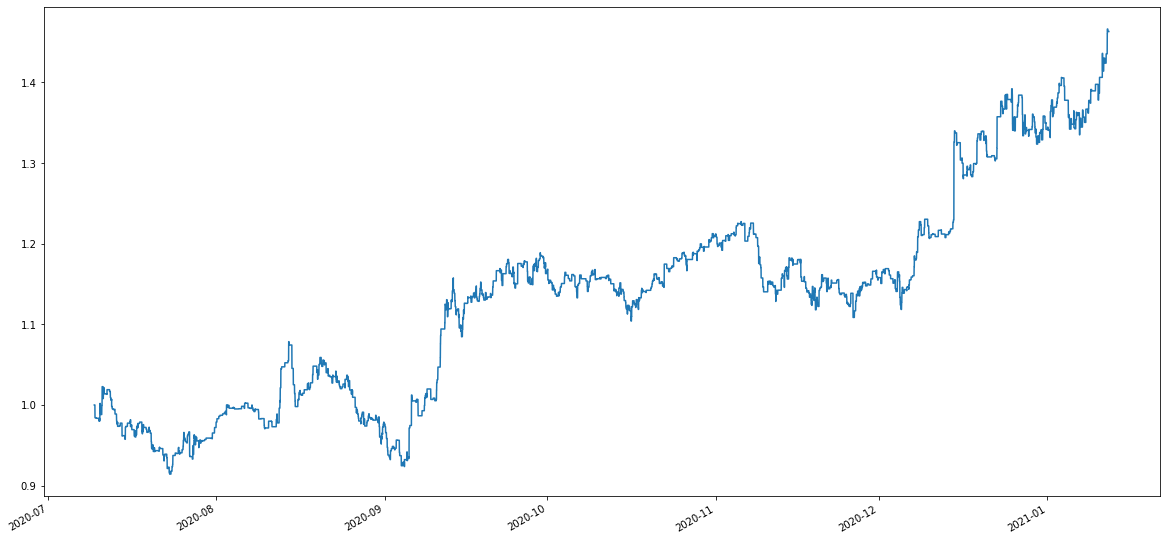

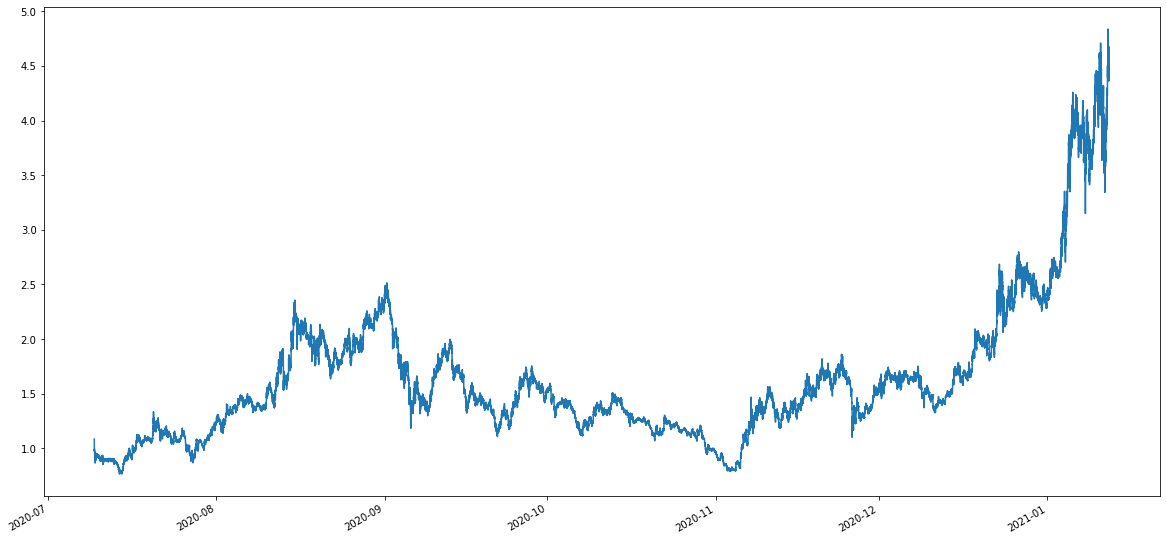

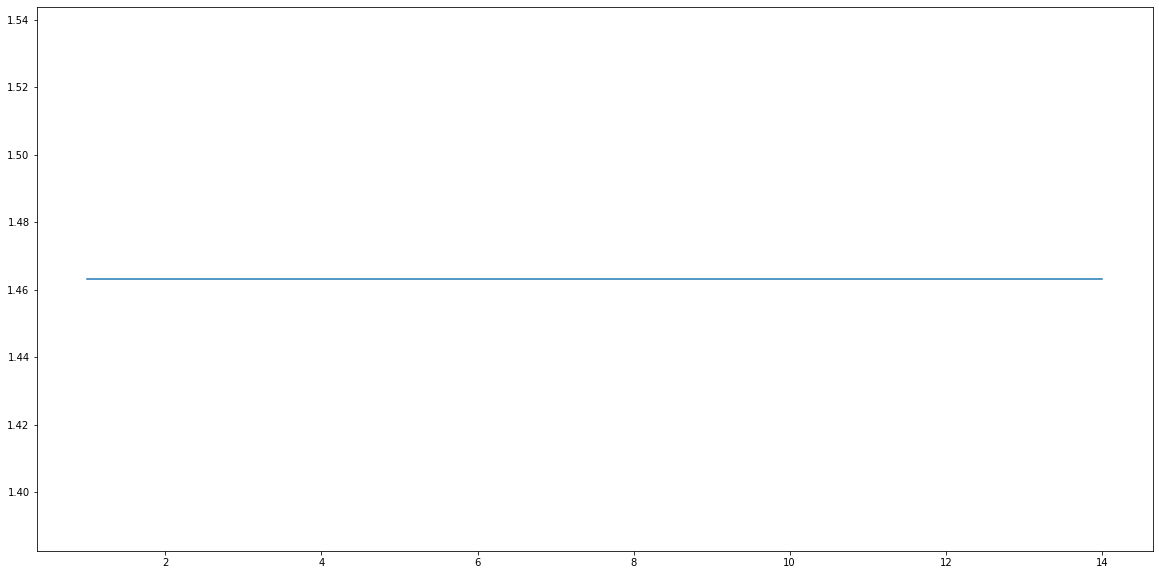

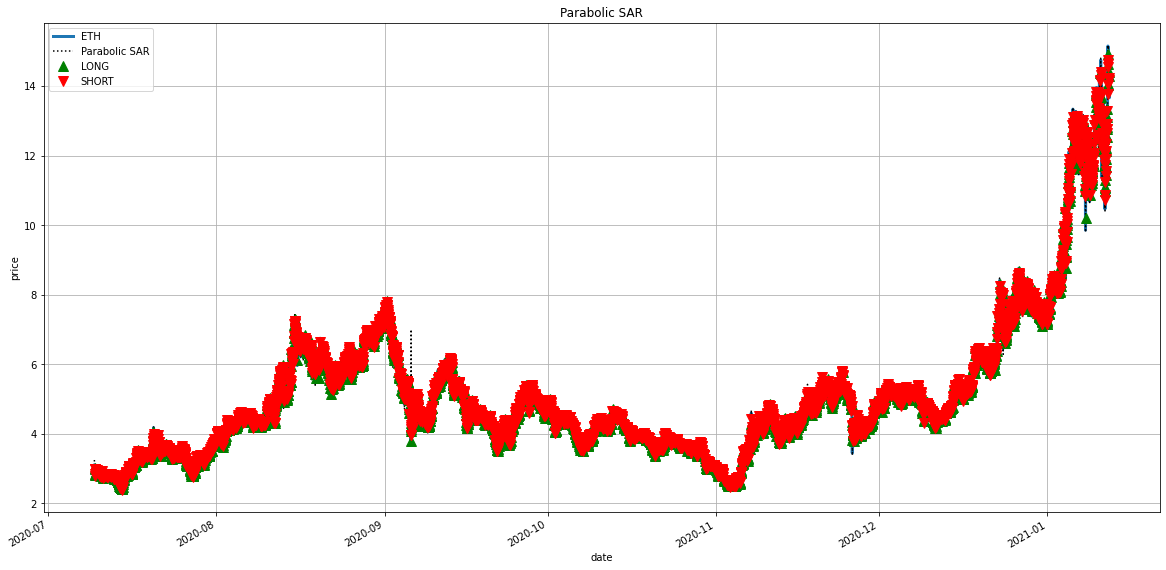

In [126]:

    
#download data via fix yahoo finance library
 
ticker=('ETH')

#slice is used for plotting
#a two year dataset with 500 variables would be too much for a figure
slicer=10


    
#delete adj close and volume
#as we dont need them


#no need to iterate over timestamp index
df.set_index(df['date'])
print(df.head())

new=signal_generation(df,parabolic_sar)
print(new)

portfolio = create_portfolio_returns(new)
fig, ax = plt.subplots(1, figsize = (20,10))
print(portfolio.loc[portfolio['positions']!=0].count()[0])
fig.autofmt_xdate()
plt.plot(new['date'], portfolio['returns'])
print(portfolio.returns.iloc[-1])
print(portfolio)
fig, ax = plt.subplots(1, figsize = (20,10))
print(portfolio.loc[portfolio['positions']!=0].count()[0])
fig.autofmt_xdate()
plt.plot(new['date'], df['close']/df["close"][1])
print(portfolio.returns.iloc[-1])
print(portfolio)

returns = []
for i in range(1, 15):
    initial_af = i/100
    new=signal_generation(df,parabolic_sar, initial_af)
    portfolio = create_portfolio_returns(new)
    returns.append(portfolio.iloc[-1]['returns'])
fig, ax = plt.subplots(1, figsize = (20,10))
plt.plot(range(1, 15), returns)

#convert back to time series for plotting
#so that we get a date x axis
new.set_index(new['date'],inplace=True)

#shorten our plotting horizon and plot
new=new[slicer:]
plot(new,ticker) 

#print(new)
#how to calculate stats could be found from my other code called Heikin-Ashi
# https://github.com/je-suis-tm/quant-trading/blob/master/heikin%20ashi%20backtest.py



In [127]:
import backtrader as bt

class MySignal(bt.Indicator):
    lines = ('signal',)
    params = (('period', 30),)

    def __init__(self):
        self.lines.signal = self.data - bt.indicators.SMA(period=self.p.period)

class PSARStrat(bt.Strategy):

    params = (
        ("period", 2),
        ("af", 0.02),
        ("afmax", 0.2)
        )

    def __init__(self):
        self.psar = bt.indicators.ParabolicSAR(period=self.p.period, af=self.p.af, afmax=self.p.afmax)

    def next(self):
        pass


cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)

cerebro.add_signal(bt.SIGNAL_LONGSHORT, MySignal)
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Starting Portfolio Value: nan
